# Meteo Analyse

## Datenaufbereitung

In [8]:
# Python 3.8
# numpy 1.18
# pandas 1.0.4
# matplotlib 3.2
# Author: LeStuder
# Data: MeteoSwiss. Area-mean temperatures of Switzerland. DOI: 10.18751/Climate/Timeseries/CHTM/1.1

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt


df = pd.read_csv('rawdata.csv',sep=';')
df = df.drop(columns=['djf','mam','jja','son','winter','summer','year'])
df = df.drop([df.index[-1]])

In [2]:
df = pd.melt(df, id_vars=['time'], value_vars=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']) # tidy df

In [3]:
df['month_id'] = None
monthslist = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for i in range(len(monthslist)):
    df.loc[df['variable'] == str(monthslist[i]), 'month_id'] = i+1
df.columns = ['year','month','value','month_id']
df = df.sort_values(by=['year','month_id'])
df = df.reset_index(drop=True)

In [4]:
df['mean'] = None
df['delta'] = None
for i in range(len(monthslist)):
    mean_of_month = df[df.month.eq(monthslist[i])].value.mean(axis=0)
    df.loc[df.month == str(monthslist[i]), 'mean'] = mean_of_month
df['delta'] = df['value'] - df['mean']
df

,year,month,value,month_id,mean,delta
0,1864,jan,-6.16,1,-0.930705,-5.22929
1,1864,feb,-1.61,2,0.30891,-1.91891
2,1864,mar,4.04,3,3.69705,0.342949
3,1864,apr,6.34,4,7.56128,-1.22128
4,1864,may,11.72,5,11.869,-0.148974
...,...,...,...,...,...,...
1867,2019,aug,18.65,8,16.4508,2.19923
1868,2019,sep,14.84,9,13.1954,1.64462
1869,2019,oct,11.44,10,8.33673,3.10327
1870,2019,nov,4.94,11,3.44872,1.49128


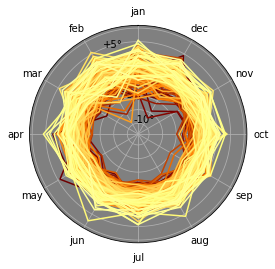

In [6]:
deltayears = int(df.iloc[-1]['year'])-int(df.iloc[0]['year'])
colors = plt.cm.afmhot(np.linspace(0.2,0.8,deltayears+1)) #change cm.@ to another colormap if needed

'''
ax = polar subplot
deltayears = number of years
temp_df = slice of df that includes all months with corresponding data from jan[this year] to jan[next year]

all years are iterated through
'''


fig = plt.figure()
ax = plt.subplot(111, projection='polar')
for i in range(deltayears+1):
    temp_df = df[df.year.eq(int(df.iloc[0]['year'])+i)]
    try:
        nxjan_df = df.loc[temp_df.index[-1]+1,] # fetch january from next year
    except KeyError:
        pass
    if temp_df.index[-1] != df.index[-1]:
        temp_df = temp_df.append(nxjan_df) 
    temp_df = temp_df.reset_index(drop=True)
    ax.plot(temp_df.index*np.pi/6, temp_df.delta.astype(float), color = colors[i])  #comment this and un-comment if-else for "last 5 year"-lines
    #if temp_df.year.le(2014)[0]:
    #    ax.plot(temp_df.index*np.pi/6, temp_df.delta.astype(float), color = colors[i])
    #else:
    #    ax.plot(temp_df.index*np.pi/6, temp_df.delta.astype(float), color = '#0055ff')
    ax.set_thetagrids(range(0, 360, 30), df.month)
    ax.set_rlim(-12, 8)
    ax.set_facecolor('0.5')
    ax.set_theta_offset(np.pi*0.5)
    #ax.tick_params(axis='y', which='both') #can be used to set stuff like font and fontsize
    ax.set_yticklabels(labels=['-10°','','-5°','','0°','','+5°',''])
    textvar = ax.text(0.5, 0.5, temp_df.iloc[0]['year'],
        verticalalignment='center', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=15)
    #fig.savefig(r'pictures\meteo_' + str(temp_df.iloc[0]['year']) + '.png', dpi=300) #uncomment for saving
    textvar.remove()